First 5 rows:
   vitamin_a  vitamin_c     fiber   type
0  70.783510  35.779827  8.313735   root
1  54.353822  49.421245  5.989785  fruit
2   8.172535  82.824925  1.149330  fruit
3  45.830064  33.520805  0.938573  leafy
4  48.469629  17.376159  9.096268   root

Last 5 rows:
    vitamin_a  vitamin_c     fiber   type
95  71.024280  58.280684  0.801800  leafy
96  31.435011  99.543752  3.547713   root
97  47.116790  85.569609  9.417257  leafy
98  82.163690  52.144569  6.685726   root
99  45.926520   6.364091  6.786700  fruit
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   vitamin_a  100 non-null    float64
 1   vitamin_c  100 non-null    float64
 2   fiber      100 non-null    float64
 3   type       100 non-null    object 
dtypes: float64(3), object(1)
memory usage: 3.3+ KB

Missing Values:

vitamin_a    0
vitamin_c    0
fiber        0
type         0
d

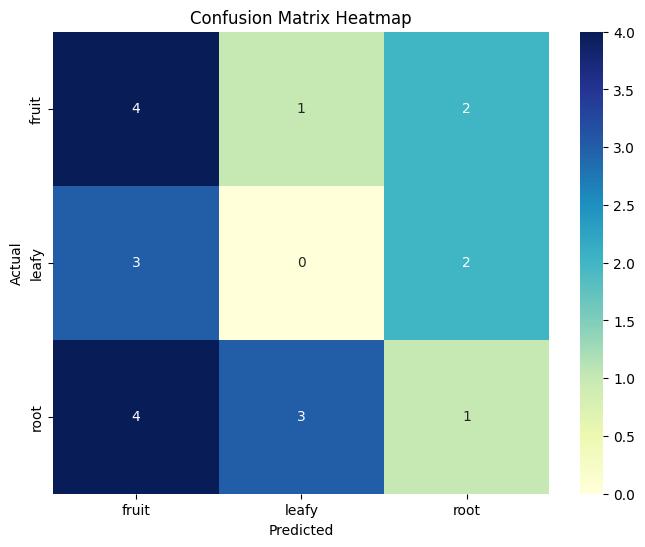

In [2]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the CSV file
data = pd.read_csv('/content/vegetables.csv')

# Display first and last few rows
print("First 5 rows:")
print(data.head())
print("\nLast 5 rows:")
print(data.tail())

# Basic data info
data.info()

# Check for missing values
print("\nMissing Values:\n")
print(data.isnull().sum())

# Features and target
X = data[['vitamin_a', 'vitamin_c', 'fiber']]
y = data['type']

# Encode target labels
y_encoder = LabelEncoder()
y_encoded = y_encoder.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy and classification report
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=y_encoder.classes_))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Heatmap for Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=y_encoder.classes_, yticklabels=y_encoder.classes_)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
